In [1]:
#Import module
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [2]:
#Read data ---#1
InputFile = "Binned_Data_binning_dpleo_20180121_run076kg5.dat"
Data = np.genfromtxt(InputFile)

#Input calculation ---#1
BJD_time = Data[:,0]
exp_time = Data[:,1]
Phase = Data[:,2]
Flux_12 = Data[:,3]
Flux_err_12 = Data[:,4]

#DP Leo parameters
#t0 = 2456748.3003738
t0 = 2458140.4265051
P = 0.062362

In [3]:
binning_number = 250
#phi_1 = -0.3501
phi_1 = -0.3600790
dphi_1 = binning_number*exp_time[0]/2
phi_2 = 0.203715
dphi_2 = binning_number*exp_time[0]/2

phase = (phi_1+phi_2)/2
BJD_time = (phase*P) + t0
print(phase, BJD_time)

psi = np.abs((phi_2-np.abs(phi_1)))
#dpsi = exp_time[0]
dpsi = np.sqrt((dphi_1**2)+(dphi_2**2))
#print('%0.3f %0.3f' %(psi, dpsi))
psi_deg = psi*180
dpsi_deg = dpsi*180
#print(psi_deg, dpsi_deg)


print('The beginning of the bright pole:', phi_1)
print('The uncertainty of the beginning of the bright pole:', dphi_1)
print('The end of the bright pole:', phi_2)
print('The uncertainty of the end of the bright pole:', dphi_2)
print('The longitude of the center of the prime-pole bright pole:', psi_deg)
print('The uncertainty of the longitude of the center of the prime-pole bright pole:', dpsi_deg)

-0.07818199999999999 2458140.421629514
The beginning of the bright pole: -0.360079
The uncertainty of the beginning of the bright pole: 0.0037500000000000003
The end of the bright pole: 0.203715
The uncertainty of the end of the bright pole: 0.0037500000000000003
The longitude of the center of the prime-pole bright pole: 28.145519999999994
The uncertainty of the longitude of the center of the prime-pole bright pole: 0.9545941546018392


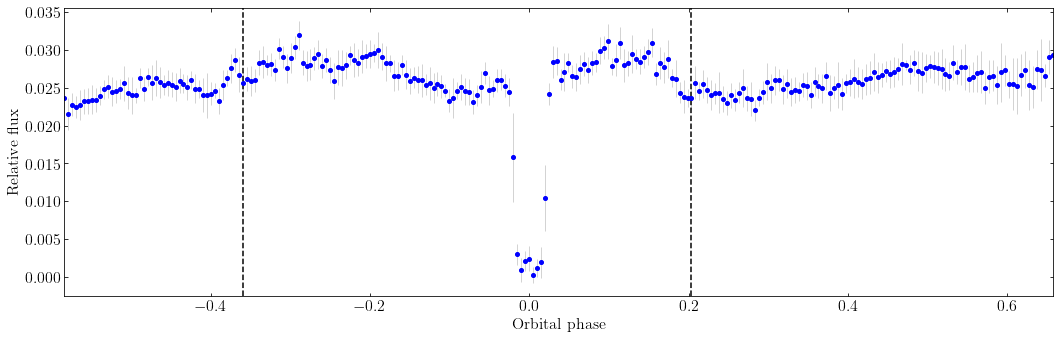

In [4]:
fig, (ax0) = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(15, 5), tight_layout=True)

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(Phase, Flux_12, yerr=Flux_err_12, fmt='o', color='blue', markersize = '4',
             ecolor='lightgray', elinewidth=1, capsize=0)


ax0.set_xlabel('Orbital phase')
ax0.set_ylabel('Relative flux')
ax0.set_xlim(Phase[0], Phase[-1])

ax0.axvline(x=float(phi_1), color='k', linestyle='--')
ax0.axvline(x=float(phi_2), color='k', linestyle='--')

fig.align_ylabels()
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
#plt.savefig("composite_model_20150318_run031kg5.png")
plt.show()